Assignment:6 Regression Analysis<b>

1. From Salary_Data <br>
   a. Identify dependent and independent variable.<br>
   b. Draw scatter plot and comment on it.<br>
   c. Calculate correlation coefficient and test its significance<br>
   d. Fit linear regression model and describe the output.<br>
   e. Diagnose the model developed.<br>
2. Get a subset of iris data with only two species. Partition data into train and test <br>
   data. Fit logistic regression to the train data and apply the model developed to test <br>
   data. Comment on accuracy of the model. (Y=Species, and all other variables are X's)<br>
3. Take a subset of iris data having only numeric columns. Partition data into train and test <br>
   data.Using Train data; fit a regression model for Petal.Length on remaining variables. <br>
   Apply the model developed to test data and check its accuracy.<br>

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
sal_data = pd.read_csv('Salary_Data.csv')

In [66]:
sal_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


[]

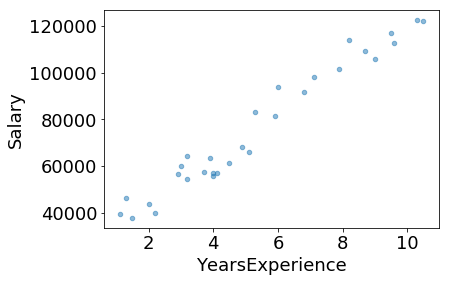

In [67]:
plt.rcParams.update({'font.size': 18})
sal_data.plot(kind='scatter',y='Salary',x='YearsExperience',alpha=0.5)
plt.plot()

Seeing above scatter plot we can say that Salary is linearly dependent on years of Experience.

In [68]:
sal_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [69]:
import numpy as np
print('Coefficient of Correlation is ',np.corrcoef(sal_data['YearsExperience'].values,sal_data['Salary'].values)[0,1])

Coefficient of Correlation is  0.9782416184887599


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y=sal_data['Salary'].values
x=sal_data.drop('Salary',axis=1).values
linreg = LinearRegression()
linreg=linreg.fit(x,y)

Coeffecient: [9449.96232146]
Mean squared error: 5592.043608760662
Variance score: 0.96


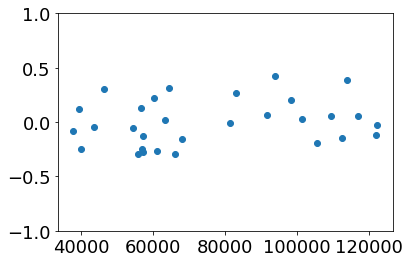

In [135]:
print('Coeffecient:',linreg.coef_)
ypred=linreg.predict(x)

from sklearn.metrics import mean_squared_error,r2_score
print('Mean squared error:',np.sqrt(mean_squared_error(y,ypred)))
# print('Mean squared error:',mean_squared_error(y,ypred))
print('Variance score: %.2f' % r2_score(y, ypred))
residuals=y-ypred
stdresiduals=(y-ypred)/y.std()
#RESIDUL PLOT
# plt.scatter(x=y, y=residuals)
# plt.show()
plt.ylim(-1,1)
# QQPlot
ys=pd.Series(y)
stdquartiles=ys.apply(getquartiles,args=(ys,))
# print(stdquartiles)
plt.scatter(x=y, y=stdresiduals)
plt.show()


In [124]:
def getquartiles(x,ys):
#     print(ys.quantile(0))
    if x<=ys.quantile(0):
        return -2
    elif x<=ys.quantile(0.25):
        return -1 
    elif x<=ys.quantile(0.50):
        return 0
    elif x<=ys.quantile(0.75):
        return 1
    else:
        return 2

In [142]:
import numpy as np
import pandas as pd
irisdata = pd.read_csv('Iris.csv')

In [152]:
irisdata['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [168]:
irisdatasubset=irisdata.where(irisdata['Species'].isin(['Iris-setosa','Iris-versicolor']))

In [172]:
irisdatasubset.head(10)#isnull().sum()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa
5,6.0,5.4,3.9,1.7,0.4,Iris-setosa
6,7.0,4.6,3.4,1.4,0.3,Iris-setosa
7,8.0,5.0,3.4,1.5,0.2,Iris-setosa
8,9.0,4.4,2.9,1.4,0.2,Iris-setosa
9,10.0,4.9,3.1,1.5,0.1,Iris-setosa


In [175]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
le = LabelEncoder()
encoded_mf = le.fit_transform(irisdatasubset['Species'])
# lb = LabelBinarizer()
# encoded_em = lb.fit_transform(encoded_mf)
# edf = pd.DataFrame(encoded_em,columns=['Iris-setosa','Iris-versicolor'])
# encoded_em

TypeError: '<' not supported between instances of 'float' and 'str'